In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
import time


# Exploratory Data Analysis (EDA)

In [3]:
X_train = pd.read_csv('/content/drive/MyDrive/Anomaly_Detection/Files/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/Anomaly_Detection/Files/y_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/Anomaly_Detection/Files/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Anomaly_Detection/Files/y_test.csv')

In [4]:
y_train = y_train.values.reshape(-1, )
y_test = y_test.values.reshape(-1, )

In [5]:
acc = []
balanced_acc = []
precision = []
recall = []
f1 = []
time_to_train = []
time_to_predict = []

## Decision Tree

In [6]:
start_time = time.time()
decisiontree = DecisionTreeClassifier(random_state=0,  class_weight= "balanced")
decisiontree.fit(X_train, y_train)
end_time = time.time()
elapsed_time_train = end_time - start_time
joblib.dump(decisiontree, '/content/drive/MyDrive/Anomaly_Detection/Files/model/DecisionTreeClassifier_cost-sensitive.joblib')

['/content/drive/MyDrive/Anomaly_Detection/Files/model/DecisionTreeClassifier_cost-sensitive.joblib']

In [7]:
start_time = time.time()
y_pred = decisiontree.predict(X_test)
end_time = time.time()
elapsed_time_predict = end_time - start_time
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[6046696,    2901],
       [     30,       0]])

In [8]:
time_to_train.append (elapsed_time_train)
time_to_predict.append (elapsed_time_predict)

In [9]:
acc.append(accuracy_score(y_test, y_pred))
balanced_acc.append(balanced_accuracy_score(y_test, y_pred))
precision.append(precision_score(y_test, y_pred, average='macro'))
recall.append(recall_score(y_test, y_pred, average='macro'))
f1.append(f1_score(y_test, y_pred, average='macro'))

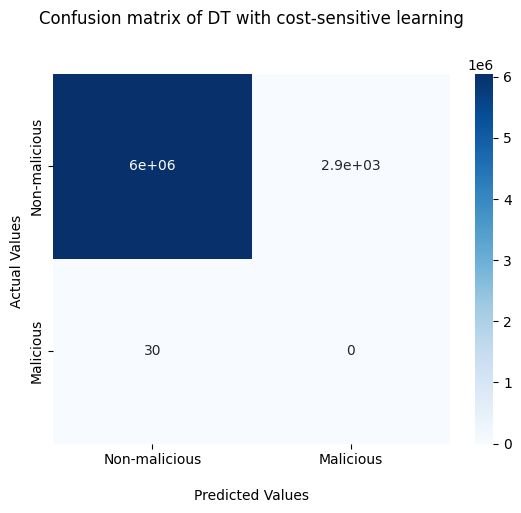

In [10]:
target_names = ['Non-malicious','Malicious']
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion matrix of DT with cost-sensitive learning\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)

## Display the visualization of the Confusion Matrix.
plt.show()

## SGD Classifier

In [11]:
start_time = time.time()
sgd = SGDClassifier(class_weight= "balanced")
sgd.fit(X_train, y_train)
end_time = time.time()
elapsed_time_train = end_time - start_time
joblib.dump(sgd, '/content/drive/MyDrive/Anomaly_Detection/Files/model/SGDClassifier_cost-sensitive.joblib')

['/content/drive/MyDrive/Anomaly_Detection/Files/model/SGDClassifier_cost-sensitive.joblib']

In [12]:
start_time = time.time()
y_pred = sgd.predict(X_test)
end_time = time.time()
elapsed_time_predict = end_time - start_time
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[5275842,  773755],
       [      3,      27]])

In [13]:
time_to_train.append (elapsed_time_train)
time_to_predict.append (elapsed_time_predict)

In [14]:
acc.append(accuracy_score(y_test, y_pred))
balanced_acc.append(balanced_accuracy_score(y_test, y_pred))
precision.append(precision_score(y_test, y_pred, average='macro'))
recall.append(recall_score(y_test, y_pred, average='macro'))
f1.append(f1_score(y_test, y_pred, average='macro'))

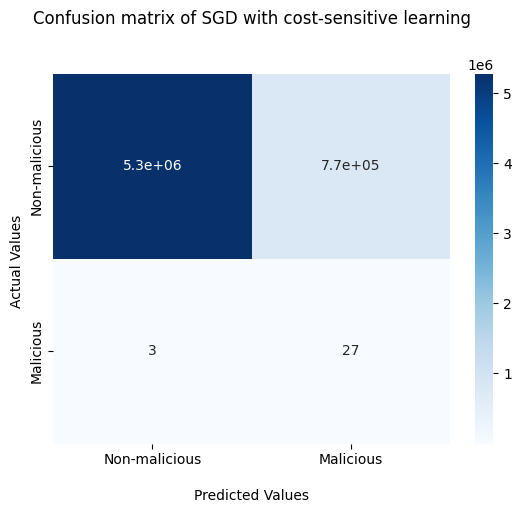

In [15]:
target_names = ['Non-malicious','Malicious']
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion matrix of SGD with cost-sensitive learning\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)

## Display the visualization of the Confusion Matrix.
plt.show()

## MLP Classifier

In [ ]:
start_time = time.time()
mlp = MLPClassifier(random_state=1)
mlp.fit(X_train, y_train)
end_time = time.time()
elapsed_time_train = end_time - start_time
joblib.dump(mlp, '/content/drive/MyDrive/Anomaly_Detection/Files/model/MLPClassifier_original.joblib')

['/content/drive/MyDrive/Anomaly_Detection/Files/model/MLPClassifier_original.joblib']

In [ ]:
start_time = time.time()
y_pred = mlp.predict(X_test)
end_time = time.time()
elapsed_time_predict = end_time - start_time
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[6049597,       0],
       [     30,       0]])

In [ ]:
time_to_train.append (elapsed_time_train)
time_to_predict.append (elapsed_time_predict)

In [ ]:
acc.append(accuracy_score(y_test, y_pred))
balanced_acc.append(balanced_accuracy_score(y_test, y_pred))
precision.append(precision_score(y_test, y_pred, average='macro'))
recall.append(recall_score(y_test, y_pred, average='macro'))
f1.append(f1_score(y_test, y_pred, average='macro'))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


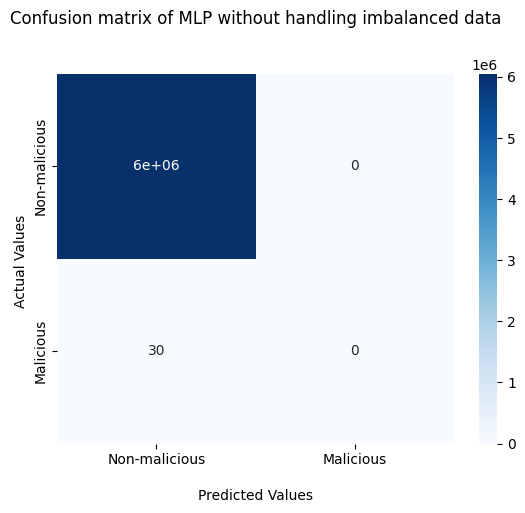

In [ ]:
target_names = ['Non-malicious','Malicious']
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion matrix of MLP without handling imbalanced data\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)

## Display the visualization of the Confusion Matrix.
plt.show()

## KMeans

In [ ]:
start_time = time.time()
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto")
kmeans.fit(X_train)
end_time = time.time()
elapsed_time_train = end_time - start_time
joblib.dump(kmeans, '/content/drive/MyDrive/Anomaly_Detection/Files/model/KMeans_original.joblib')

['/content/drive/MyDrive/Anomaly_Detection/Files/model/KMeans_original.joblib']

In [ ]:
start_time = time.time()
y_pred = kmeans.predict(X_test)
end_time = time.time()
elapsed_time_predict = end_time - start_time
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[4374425, 1675172],
       [      2,      28]])

In [ ]:
time_to_train.append (elapsed_time_train)
time_to_predict.append (elapsed_time_predict)

In [ ]:
acc.append(accuracy_score(y_test, y_pred))
balanced_acc.append(balanced_accuracy_score(y_test, y_pred))
precision.append(precision_score(y_test, y_pred, average='macro'))
recall.append(recall_score(y_test, y_pred, average='macro'))
f1.append(f1_score(y_test, y_pred, average='macro'))

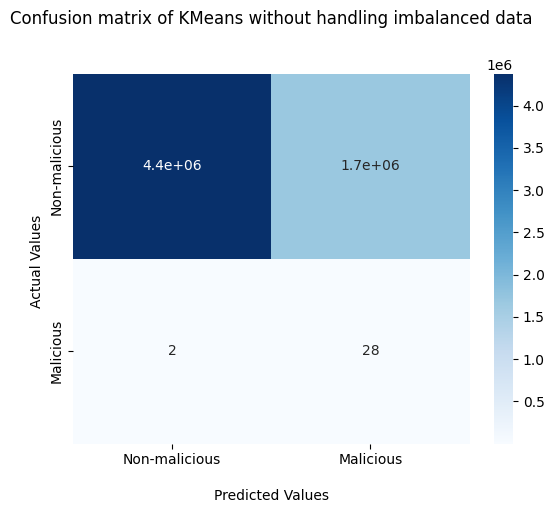

In [ ]:
target_names = ['Non-malicious','Malicious']
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion matrix of KMeans without handling imbalanced data\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)

## Display the visualization of the Confusion Matrix.
plt.show()